In [1]:
#Import modules
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
#import random
from sklearn.utils import shuffle

In [2]:
# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :3].T
y = iris.target.T

Y1 = np.select([y == 0], [1])
Y2 = np.select([y == 1], [1])
Y3 = np.select([y == 2], [1])
Y = np.stack((Y1, Y2, Y3))

X = X.T
Y = Y.T
y = y.T

#xxx = X[0,:]

#print("X[0,:] = " + str(X[0,:]))
#print("Y[0,:] = " + str(Y[0,:]))
#print("y[0]= " + str(y[0]))

# Shuffle data
XS, YS, yy = shuffle(X, Y, y)

#test = np.where((XS==xxx).all(axis=1))[0]

#print("XS[i,:] = " + str(XS[test[0],:]))
#print("YS[i,:] = " + str(YS[test[0],:]))
#print("yy[i] = " + str(yy[test[0]]))

X = XS.T
Y = YS.T
y = yy.T

m = X.shape[1]

# use 60 % for training and 40 % for test.
max = int(m * 0.6)

# Traing set
X_train = X[:, :max]
y_train = Y[:, :max]
y_train_real = y[:max]

# Test set
X_test = X[:, max:m]
y_test = Y[:, max:m]
y_test_real = y[max:m]

print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_train_real.shape = " + str(y_train_real.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_test.shape = " + str(y_test.shape))
print("y_test_real.shape = " + str(y_test_real.shape))

X_train.shape = (3, 90)
y_train.shape = (3, 90)
y_train_real.shape = (90,)
X_test.shape = (3, 60)
y_test.shape = (3, 60)
y_test_real.shape = (60,)


In [3]:
def initialize_parameters(nx, nh, ny):
    W1 = np.random.randn(nh, nx) * 0.01
    b1 = np.zeros((nh, 1))
    W2 = np.random.randn(ny, nh) * 0.01
    b2 = np.zeros((ny, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [4]:
# tanh activation function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def propagate_forward(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    #print("Z1" + str(Z1.shape))
    #print("A1" + str(A1.shape))
    #print("Z2" + str(Z2.shape))
    #print("A2" + str(A2.shape))
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    
    return cache

In [7]:
def calculate_cost(A2, Y):
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))
    return cost

In [8]:
def propagate_backward(X, Y, parameters, cache):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dG1 = 1 - np.power(A1, 2)
    dZ1 = np.dot(W2.T, dZ2) * dG1
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2,
    }
    
    return grads

In [9]:
def update_parameters(parameters, grads, learning_rate=0.075):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [10]:
def model_neural_network(X, Y, iters=10000):
    m = X.shape[1]
    nx = X.shape[0]
    nh = 3
    ny = 3
    parameters = initialize_parameters(nx, nh, ny)
    costs = []
    
    for i in range(iters):
        cache = propagate_forward(X, parameters)
        A1 = cache["A1"]
        A2 = cache["A2"]
        cost = calculate_cost(A2, Y)
        costs.append(cost)
        grads = propagate_backward(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads)
        
    return costs, cache, parameters

In [11]:
costs, cache, parameters = model_neural_network(X_train, y_train)

In [12]:
def predict(X, parameters):
    cache = propagate_forward(X, parameters)
    A = cache["A2"]
    Y_hat = np.zeros((1, A.shape[1]), dtype=int)
    tmp = 0
    
    for i in range(A.shape[1]):
        Y_hat[0, i] = A[:,i].argmax()
    
    return Y_hat

In [13]:
#print("X_train.shape = " + str(X_train.shape))
#print("X_test.shape = " + str(X_test.shape))

predictions = predict(X_train, parameters)
predictions_test = predict(X_test, parameters)

#print(predictions.shape)
#print("y_train_real.shape = " + str(y_train_real.shape))
#print(predictions_test.shape)
#print("y_test_real.shape = " + str(y_test_real.shape))

#print(y_test_real == predictions_test)
print ('Accuracy for Training Set\t: %d' % float(np.sum(y_train_real == predictions) / y_train_real.shape[0] * 100) + '%')
print ('Accuracy for Test Set\t\t: %d' % float(np.sum(y_test_real == predictions_test) / y_test_real.shape[0] * 100) + '%')

Accuracy for Training Set	: 95%
Accuracy for Test Set		: 93%


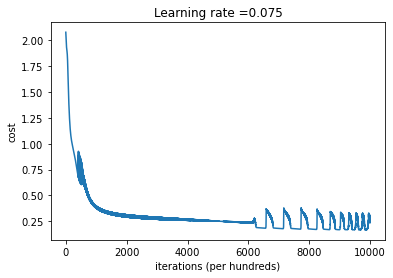

In [14]:
# Plot learning curve (with costs)
learning_rate=0.075
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()